In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
import NeuralNet as nn

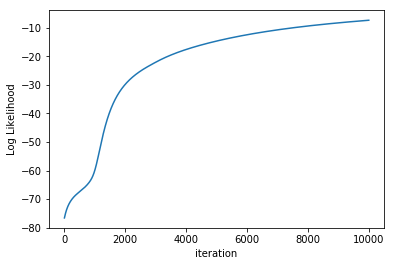

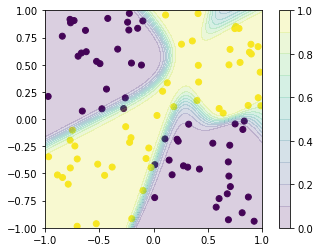

In [2]:
class ClassificationNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_output):
        truncnorm = st.truncnorm(a=-2, b=2, scale=1)
        super().__init__(
            w1=truncnorm.rvs((n_input, n_hidden)),
            b1=np.zeros(n_hidden),
            w2=truncnorm.rvs((n_hidden, n_output)),
            b2=np.zeros(n_output)
        )

    def __call__(self, x, y=None):
        h = nn.tanh(x @ self.w1 + self.b1)
        self.py = nn.random.Bernoulli(logit=h @ self.w2 + self.b2, data=y)
        return self.py.mu.value
    
    
def create_data():
    x = np.random.uniform(-1., 1., size=(100, 2))
    labels = np.prod(x, axis=1) > 0
    return x, labels.reshape(-1, 1)


x_train, y_train = create_data()
model = ClassificationNetwork(2, 4, 1)
optimizer = nn.optimizer.Adam(model, 1e-3)
history = []
for i in range(10000):
    model.clear()
    model(x_train, y_train)
    log_likelihood = model.log_pdf()
    log_likelihood.backward()
    optimizer.update()
    history.append(log_likelihood.value)
    
plt.plot(history)
plt.xlabel("iteration")
plt.ylabel("Log Likelihood")
plt.show()
    
x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
y = model(x).reshape(100, 100)

levels = np.linspace(0, 1, 11)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:,0])
plt.contourf(x0, x1, y, levels, alpha=0.2)
plt.colorbar()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal')
plt.show()    